In [1]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Convolution2D,Dense,Flatten,InputLayer,MaxPool2D,Dropout

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

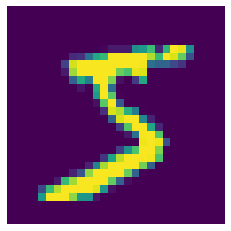

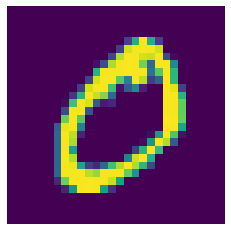

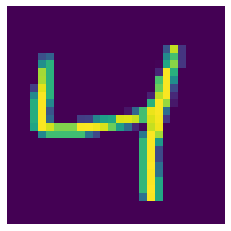

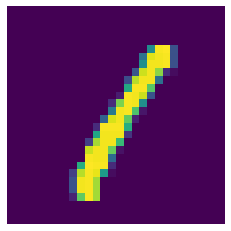

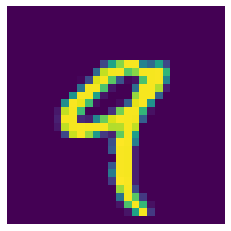

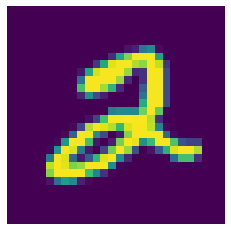

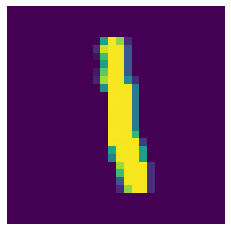

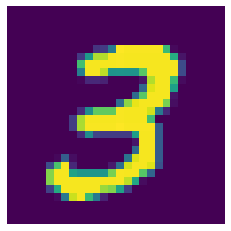

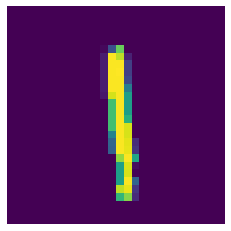

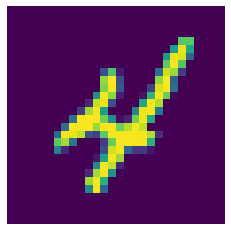

In [4]:

for i in range(10):
    plt.figure(i)
    plt.imshow(X_train[i])
    plt.axis('off')

In [5]:
def preprocess(X,y):
    X = X.reshape((-1,28,28,1))
    y = to_categorical(y)
    return X,y

In [6]:
X_train,y_train = preprocess(X_train,y_train)

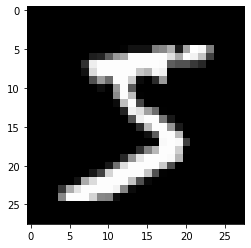

In [7]:
plt.imshow(X_train[0].reshape(28,28),cmap="gray")

In [8]:
model = Sequential()

In [9]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape = (28,28,1)))
model.add(Dropout(0.25))
model.add(MaxPool2D(2,2))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
hist = model.fit(X_train,y_train,batch_size=128,epochs=4,validation_split=0.2)

Epoch 1/4
375/375 [==============================] - 35s 92ms/step - loss: 0.7859 - accuracy: 0.8789 - val_loss: 0.1220 - val_accuracy: 0.9631
Epoch 2/4
375/375 [==============================] - 33s 88ms/step - loss: 0.1089 - accuracy: 0.9687 - val_loss: 0.0844 - val_accuracy: 0.9739
Epoch 3/4
375/375 [==============================] - 33s 88ms/step - loss: 0.0730 - accuracy: 0.9779 - val_loss: 0.0589 - val_accuracy: 0.9826
Epoch 4/4
375/375 [==============================] - 34s 90ms/step - loss: 0.0550 - accuracy: 0.9838 - val_loss: 0.0577 - val_accuracy: 0.9834


In [12]:
h = hist.history

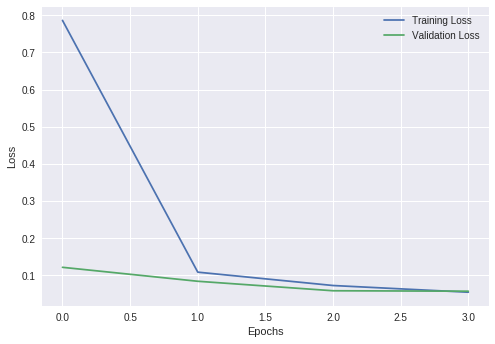

In [13]:
plt.style.use('seaborn')
plt.plot(h['loss'],label='Training Loss')
plt.plot(h['val_loss'],label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

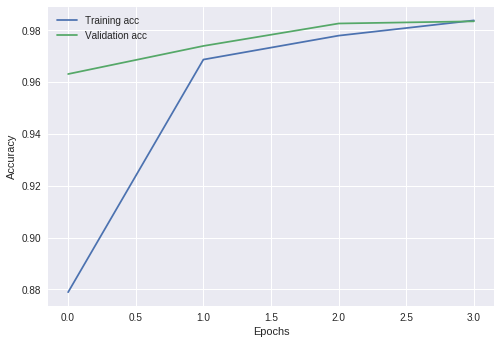

In [14]:
plt.style.use('seaborn')
plt.plot(h['accuracy'],label='Training acc')
plt.plot(h['val_accuracy'],label='Validation acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [15]:
X_test,y_test = preprocess(X_test,y_test)

In [16]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0553 - accuracy: 0.9826


[0.055270928889513016, 0.9825999736785889]

In [17]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape = (28,28,1)))
model.add(Dropout(0.25))
# model.add(MaxPool2D(2,2))
model.add(Convolution2D(64,(3,3),activation='relu'))
# model.add(MaxPool2D(2,2))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                309770    
Total params: 365,514
Trainable params: 365,514
Non-trainable params: 0
________________________________________________

In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
hist = model.fit(X_train,y_train,batch_size=128,epochs=10,validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 156s 417ms/step - loss: 0.6314 - accuracy: 0.9316 - val_loss: 0.0754 - val_accuracy: 0.9784
Epoch 2/10
375/375 [==============================] - 155s 413ms/step - loss: 0.0666 - accuracy: 0.9794 - val_loss: 0.0621 - val_accuracy: 0.9827
Epoch 3/10
375/375 [==============================] - 155s 413ms/step - loss: 0.0459 - accuracy: 0.9854 - val_loss: 0.0679 - val_accuracy: 0.9809
Epoch 4/10
375/375 [==============================] - 155s 412ms/step - loss: 0.0337 - accuracy: 0.9892 - val_loss: 0.0736 - val_accuracy: 0.9831
Epoch 5/10
375/375 [==============================] - 156s 415ms/step - loss: 0.0241 - accuracy: 0.9924 - val_loss: 0.0704 - val_accuracy: 0.9838
Epoch 6/10
375/375 [==============================] - 155s 413ms/step - loss: 0.0234 - accuracy: 0.9926 - val_loss: 0.0741 - val_accuracy: 0.9830
Epoch 7/10
375/375 [==============================] - 155s 414ms/step - loss: 0.0193 - accuracy: 0.9936 - val_loss: 0.0886 -

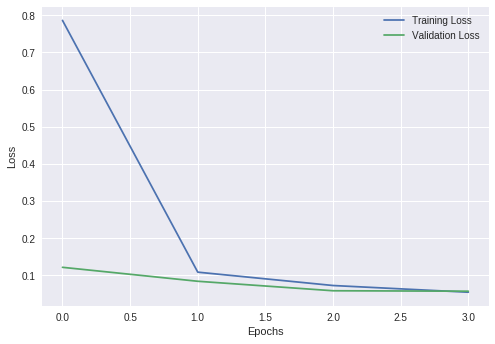

In [20]:
plt.style.use('seaborn')
plt.plot(h['loss'],label='Training Loss')
plt.plot(h['val_loss'],label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

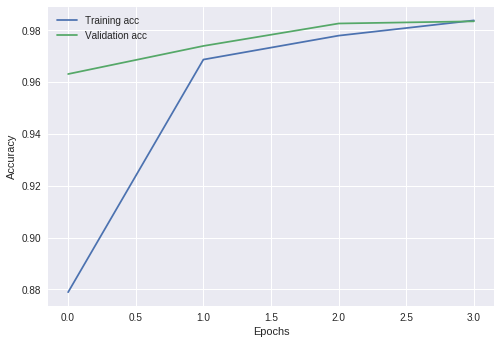

In [21]:
plt.style.use('seaborn')
plt.plot(h['accuracy'],label='Training acc')
plt.plot(h['val_accuracy'],label='Validation acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()